In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
le = LabelEncoder()
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])


In [ ]:
X = df.drop('y', axis=1)
y = df['y']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
dt_predictions = dt.predict(X_test)
rf_predictions = rf.predict(X_test)


In [ ]:
print("Decision Tree Model Evaluation:")
print(classification_report(y_test, dt_predictions))

print("Random Forest Model Evaluation:")
print(classification_report(y_test, rf_predictions))


Decision Tree Model Evaluation:
              precision    recall  f1-score   support

          no       0.91      0.92      0.91      7303
         yes       0.32      0.31      0.32       935

    accuracy                           0.85      8238
   macro avg       0.62      0.61      0.62      8238
weighted avg       0.85      0.85      0.85      8238

Random Forest Model Evaluation:
              precision    recall  f1-score   support

          no       0.91      0.96      0.94      7303
         yes       0.47      0.27      0.34       935

    accuracy                           0.88      8238
   macro avg       0.69      0.62      0.64      8238
weighted avg       0.86      0.88      0.87      8238



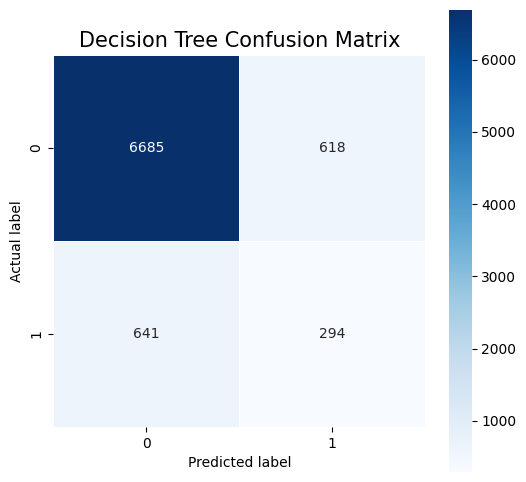

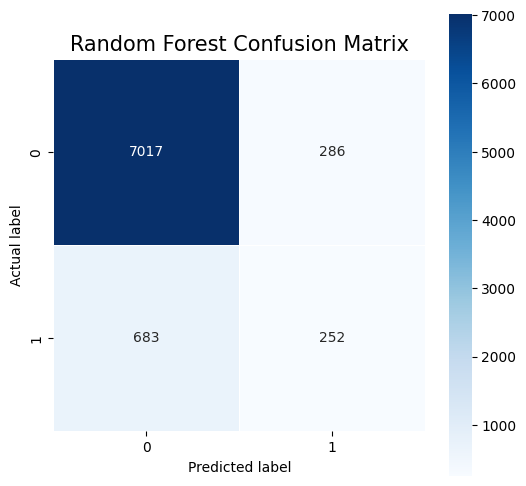

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_predictions)

# Compute confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)

# Display the confusion matrix for Decision Tree
plt.figure(figsize=(6,6))
sns.heatmap(dt_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Decision Tree Confusion Matrix', size = 15);
plt.show()

# Display the confusion matrix for Random Forest
plt.figure(figsize=(6,6))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Random Forest Confusion Matrix', size = 15);
plt.show()
